# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Text(0.5,1,'Temperatures of our server throughout the day')

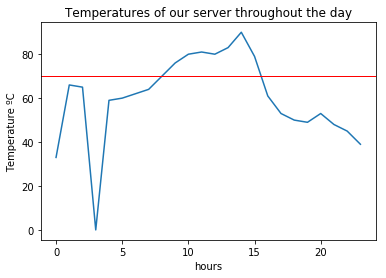

In [332]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [333]:
# assign a variable to the list of temperatures
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]

# 1. Calculate the minimum of the list and print the value using print()

min_temperature = min(temperatures_C)

print("minimum = %d" %(min_temperature))


minimum = 0


**Expected output**: 
```
minimum = 0
```

In [334]:
# 2. Calculate the maximum of the list and print the value using print()

max_temperature = max(temperatures_C)

print("maximum = %d" %(max_temperature))


maximum = 90


**Expected output**: 
```
maximum = 90
```

In [335]:
# 3. Items in the list that are greater than 70ºC and print the result

greater_70 = list(filter(lambda temperature: temperature >=70 ,temperatures_C))

print("temperatures higher or equal than 70ºC %s" %(greater_70))

temperatures higher or equal than 70ºC [70, 76, 80, 81, 80, 83, 90, 79]


**Expected output**: 
```
temperatures higher or equal than 70ºC [70, 76, 80, 81, 80, 83, 90, 79]
```

In [336]:
# 4. Calculate the mean temperature throughout the day and print the result

import statistics

mean_temperatures = statistics.mean(temperatures_C)

print("mean = %.2f" %(mean_temperatures))


mean = 60.25


**Expected output**: 
```
mean = 60.25
```

In [337]:
# 5.1 Solve the fault in the sensor by estimating a value

def fix_temperature(temperatures):

    for hour, value in enumerate(temperatures):

        if value == 0 and hour != (len(temperatures)-1):

            fix = ((temperatures[hour-1] + temperatures[hour+1])/2)

        elif value == 0 and hour == (len(temperatures)-1):

            fix = ((temperatures[hour-2] + temperatures[hour-1])/2)

    return fix


estimation = fix_temperature(temperatures_C)

print("Estimation of the temperature at 3:00 = %.1f" %(estimation))

Estimation of the temperature at 3:00 = 62.0


**Expected output**: 
```
Estimation of the temperature at 3:00 = 62.0
```

In [338]:
# 5.2 Update of the estimated value at 03:00 on the list

for position, value in enumerate(temperatures_C):

    if value == 0:

        temperatures_C.pop(position)

        temperatures_C.insert(position, estimation)

        
print("Corrected temperatures after estimation:  %s" %(temperatures_C))



Corrected temperatures after estimation:  [33, 66, 65, 62.0, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]


**Expected output**: 
```
Corrected temperatures after estimation:  [33, 66, 65, 62.0, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]
```

In [339]:
# Bonus: convert the list of ºC to ºFarenheit

# F = 1.8 * C + 32

conversor = [(1.8 * C + 32) for C in temperatures_C]

print("Temperatures in Fahrenheit Grades = %s" %(conversor))

#Another way:

conversor_2 = list(map(lambda C: 1.8 * C + 32, temperatures_C))



Temperatures in Fahrenheit Grades = [91.4, 150.8, 149.0, 143.60000000000002, 138.2, 140.0, 143.60000000000002, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.20000000000002, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


**Expected output**: 
```
Temperatures in Fahrenheit Grades = [91.4, 150.8, 149.0, 143.60000000000002, 138.2, 140.0, 143.60000000000002, 147.2, 158.0, 168.8, 176.0, 177.8, 176.0, 181.4, 194.0, 174.20000000000002, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]
```

## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [340]:
# Print True or False depending on whether you would change the cooling system or not

if len(greater_70) >= 4:
    first_condition = True

for temperature in greater_70:
    if temperature >= 80:
        second_condition = True
        break

if mean_temperatures >= 65:
        third_condition = True

if first_condition == True or second_condition == True or third_condition == True:
    print(True)
else:
    print(False)

True


**Expected output**: 
```
True
```

## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [341]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC

hour_70 = [x[t[0]] for t in enumerate(temperatures_C) if t[1]>=70]

print(hour_70)


[8, 9, 10, 11, 12, 13, 14, 15]


**Expected output**: 
```
[8, 9, 10, 11, 12, 13, 14, 15]```

In [342]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?

if len(hour_70) >= 4:

    for t in range(len(hour_70)-3):

        if (hour_70[t]+3) == hour_70[t+3]:

            print(True)

            break
else:
    
    print(False)

True


**Expected output**: 
```
True
```

In [343]:
# 3. Average of each of the lists (ºC and ºF). How they relate?

import statistics

mean_temperatures_2 = statistics.mean(temperatures_C)

mean_farenheit = statistics.mean(conversor)

print(mean_temperatures_2)

print(mean_farenheit)


62.833333333333336
145.1


**Expected output**: 
```
62.833333333333336
145.1
145.1 145.10000000000002
```

In [344]:
# 4. Standard deviation of each of the lists. How they relate?

import statistics

deviation_celsius = statistics.pstdev(temperatures_C)

deviation_farenheit = statistics.pstdev(conversor)

print(deviation_celsius, deviation_farenheit)


14.633485192833897 26.340273347101014


**Expected output**: 
```
14.633485192833897
26.34027334710101
26.34027334710101 26.340273347101014
```

In [345]:
#EXTRA





Text(0.5,1,'Temperatures of our server throughout the day')

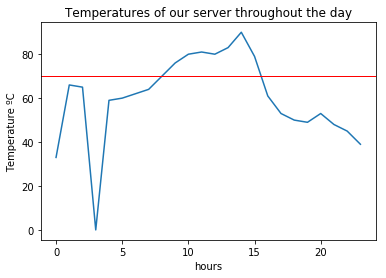

In [346]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

In [347]:
# assign a variable to the list of temperatures

# hour = x

# temp_hour = y


# 1. Calculate the minimum of the list and print the value using print()

min_temp = min(y)

min_hour = y.index(min_temp)

print("La hora con temperatura mínima fue a las", str(min_hour) + ",", "con una temperatura registrada de", min_temp)

La hora con temperatura mínima fue a las 3, con una temperatura registrada de 0


In [348]:
# 2. Calculate the maximum of the list and print the value using print()

max_temp = max(y)

max_hour = y.index(max_temp)

print("La hora con temperatura máxima fue a las", str(max_hour) + ",", "con una temperatura registrada de", max_temp)

La hora con temperatura máxima fue a las 14, con una temperatura registrada de 90


In [349]:
# 3. Items in the list that are greater than 70ºC and print the result

greater_70 = list(filter(lambda t: t >= 70, y))

hour_70 = [x[t[0]] for t in enumerate(y) if t[1]>=70]

print("Las horas con temperaturas superiores a 70º fueron", str(hour_70) + ",", "con una temperatura registrada de", greater_70, "respectivamente.")

Las horas con temperaturas superiores a 70º fueron [8, 9, 10, 11, 12, 13, 14, 15], con una temperatura registrada de [70, 76, 80, 81, 80, 83, 90, 79] respectivamente.


In [350]:
# 4. Calculate the mean temperature throughout the day and print the result

import statistics

mean_temperature = statistics.mean(y)

print("La temperatura media es:", mean_temperature)

La temperatura media es: 60.25


In [351]:
# 5.1 Solve the fault in the sensor by estimating a value

estimation = (y[2] + y[4]) / 2

print("El valor estimado es de %d" %(estimation))

El valor estimado es de 62


In [352]:
# 5.2 Update of the estimated value at 03:00 on the list

for t in y:
    if t == 0:
       y.insert(y.index(t), int(estimation))
       y.pop(y.index(t))
        

print(y)

[33, 66, 65, 62, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]


In [353]:
# Bonus: convert the list of ºC to ºFarenheit

# Farenheit = 1.8 * C + 32

conversor = [int(1.8 * C + 32) for C in y]

print(conversor)

#Otra manera

conversor_2 = list(map(lambda C: int(1.8 * C + 32), y))

[91, 150, 149, 143, 138, 140, 143, 147, 158, 168, 176, 177, 176, 181, 194, 174, 141, 127, 122, 120, 127, 118, 113, 102]


Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:

more than 4 hours with temperatures greater than or equal to 70ºC
some temperature higher than 80ºC
average was higher than 65ºC throughout the day If any of these three is met, the cooling system must be changed.

In [354]:
# Print True or False depending on whether you would change the cooling system or not

if len(hour_70) >= 4:
    first_condition = True

for temperature in greater_70:
    if temperature >= 80:
        second_condition = True

if mean_temperature >= 65:
        third_condition = True

if first_condition == True or second_condition == True or third_condition == True:
    print(True)
else:
    print(False)

True


Future improvements
We want the hours (not the temperatures) whose temperature exceeds 70ºC
Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
Average of each of the lists (ºC and ºF). How they relate?
Standard deviation of each of the lists. How they relate?

In [355]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC

print(hour_70)


[8, 9, 10, 11, 12, 13, 14, 15]


In [356]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?

if len(hour_70) >= 4:
    print("Más de 4 horas con temperaturas superiores a 70 grados")

Más de 4 horas con temperaturas superiores a 70 grados


In [357]:
# 3. Average of each of the lists (ºC and ºF). How they relate?

import statistics

mean_farenheit = int(statistics.mean(conversor))

print(mean_temperature)

print(mean_farenheit)

60.25
144


In [358]:
# 4. Standard deviation of each of the lists. How they relate?

import statistics

deviation_celsius = statistics.pstdev(y)

deviation_farenheit = statistics.pstdev(conversor)

print(round(deviation_celsius,3), round(deviation_farenheit,3))

14.633 26.334
